In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
#spark=SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().getOrCreate()
sc = spark.sparkContext
import matplotlib.pyplot as plt
import pandas
from pyspark.sql.functions import *

In [2]:
spark

In [3]:
df= spark.read.format("csv").option("header", "true").load(r"D:\DBDA\FINAL_PROJECT\vehicles.csv")

In [3]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_url: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- VIN: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- size: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- description: string (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- posting_date: string (nu

In [26]:
df.describe().show()

+-------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+-----------------+--------------------+-----------------+---------+------------------+-----------------+-----------------+------------------+-----------------+------+------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+
|summary|                  id|                 url|              region|        region_url|               price|                year|     manufacturer|               model|        condition|cylinders|              fuel|         odometer|     title_status|      transmission|              VIN| drive|              size|              type|       paint_color|           image_url|         description|              county|               state|                 lat|     long|        posting_date|
+-------+-----

In [56]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_url: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- VIN: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- size: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- description: string (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- posting_date: string (nu

In [27]:
df.columns

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date']

In [28]:
df.count()

441802

In [9]:
# Count null values for each column
null_counts = df.select([sum(col(column).isNull().cast('int')).alias(column) for column in df.columns])

# Show the counts
print(null_counts.show())

+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+------+------+------+------+-----------+---------+-----------+------+-----+-----+-----+------------+
| id| url|region|region_url|price|year|manufacturer|model|condition|cylinders| fuel|odometer|title_status|transmission|   VIN| drive|  size|  type|paint_color|image_url|description|county|state|  lat| long|posting_date|
+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+------+------+------+------+-----------+---------+-----------+------+-----+-----+-----+------------+
|  0|9884|  6901|      6533| 6446|7890|       28937|17506|   187143|   190798|16344|   17801|       21618|       15932|174486|144178|319997|106892|     143839|    13732|      13733|382283|23077|25397|24715|       22477|
+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+-

In [10]:
null_count = df.filter(col("size").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("size").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('size').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('size').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("size").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 319997
not null records 121805
total count  441802
--------------------------------------
+--------------------+------+
|                size| count|
+--------------------+------+
|             compact| 19384|
|           full-size| 63465|
|                null|319997|
|           38.004727|    28|
|            mid-size| 34476|
|         sub-compact|  3194|
|           ownership|     7|
| sacramento car d...|   148|
|                 530|   102|
| Rikers      2017...|     1|
| Rikers      2017...|     1|
| Rikers      2016...|     1|
| Rikers      2012...|     1|
| Rikers      2017...|     1|
| Rikers      2012...|     1|
| Rikers      2016...|     1|
| Rikers      2017...|     1|
| Rikers      2017...|     1|
| Rikers      2008...|     1|
| Rikers      2017...|     1|
+--------------------+------+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|                size|
+--------------------+
|             compact|
|              

In [11]:
null_count = df.filter(col("region").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("region").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('region').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('region').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("region").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 6901
not null records 434901
total count  441802
--------------------------------------
+--------------------+-----+
|              region|count|
+--------------------+-----+
|           texarkana|  211|
|        gold country|  765|
|           fairbanks|  427|
|huntsville / decatur| 1273|
|florence / muscle...|  165|
|             modesto| 2973|
|skagit / island /...|  701|
|     imperial county|  282|
|       inland empire| 2950|
|     medford-ashland| 1962|
|              mobile|  626|
|               chico| 1486|
|     kenai peninsula|  221|
|           jonesboro|  337|
|           la crosse|  521|
|    southeast alaska|   84|
|worcester / centr...| 1914|
|    mendocino county|  238|
|            show low|  112|
|         little rock| 1841|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|              region|
+--------------------+
|           texarkana|
|        gold country|
|           fairba

In [12]:
null_count = df.filter(col("price").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("price").isNotNull()).count()
print("not null records",null_count)

total_count = df.select('price').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('price').count()
print(value_counts.show())

print("--------------------------------------")
                                    
# Get unique records of a specific column
unique_records = df.select("price").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 6446
not null records 435356
total count  441802
--------------------------------------
+-----+-----+
|price|count|
+-----+-----+
|39590| 1156|
|27990| 2228|
|45300|   35|
|63814|   10|
| 5325|    1|
| 6194|    1|
|15555|    3|
|11888|   77|
|16974|    6|
|13282|    7|
|57112|    6|
|41998|  126|
|86900|    9|
|18634|    1|
|46870|    1|
|29865|    3|
|  296|   35|
|16250|   46|
|14838|    4|
|19990| 1588|
+-----+-----+
only showing top 20 rows

None
--------------------------------------
+-----+
|price|
+-----+
|39590|
|27990|
|45300|
|63814|
| 5325|
| 6194|
|15555|
|11888|
|16974|
|13282|
|57112|
|41998|
|86900|
|18634|
|46870|
|29865|
|  296|
|16250|
|14838|
|19990|
+-----+
only showing top 20 rows

15983


In [13]:
null_count = df.filter(col("year").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("year").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('year').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('year').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("year").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 7890
not null records 433912
total count  441802
--------------------------------------
+--------------------+-----+
|                year|count|
+--------------------+-----+
|2021-04-30T19:31:...|    1|
|                1953|  105|
|                1903|   12|
|2021-04-30T19:11:...|    1|
|2021-04-23T20:48:...|    1|
| depending on spe...|   28|
|2021-05-03T14:10:...|    1|
|                1957|  174|
|2021-04-23T20:44:...|    1|
|                1987|  532|
|2021-05-04T10:41:...|    1|
|                1956|  160|
|2021-05-03T16:59:...|    1|
|2021-04-23T20:44:...|    1|
|2021-04-16T20:38:...|    1|
|2021-04-23T14:03:...|    1|
|2021-04-30T19:05:...|    1|
|                2016|30434|
|                1936|   43|
|2021-04-29T14:00:...|    1|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|                year|
+--------------------+
|2021-04-30T19:31:...|
|                1953|
|                1

In [14]:
null_count = df.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('manufacturer').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("manufacturer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 28937
not null records 412865
total count  441802
--------------------------------------
+------------+-----+
|manufacturer|count|
+------------+-----+
|      jaguar| 1946|
|       buick| 5501|
|  mitsubishi| 3292|
|     pontiac| 2288|
|       lexus| 8200|
|        null|28937|
|      toyota|34202|
|    chrysler| 6031|
|       tesla|  868|
|     lincoln| 4220|
|        audi| 7573|
|      datsun|   63|
|         bmw|14699|
|        jeep|19014|
|       dodge|13707|
|       rover| 2113|
|     hyundai|10338|
|        ford|70985|
|  alfa-romeo|  897|
|    cadillac| 6953|
+------------+-----+
only showing top 20 rows

None
--------------------------------------
+------------+
|manufacturer|
+------------+
|      jaguar|
|       buick|
|  mitsubishi|
|     pontiac|
|       lexus|
|        null|
|      toyota|
|    chrysler|
|       tesla|
|     lincoln|
|        audi|
|      datsun|
|         bmw|
|        jeep|
|       dodge|
|       rover|
|     hyundai|
|        ford|
|  alfa-r

In [15]:
null_count = df.filter(col("model").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("model").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('model').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('model').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("model").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 17506
not null records 424296
total count  441802
--------------------------------------
+--------------------+-----+
|               model|count|
+--------------------+-----+
|            lacrosse|  433|
|             4runner| 1073|
|                 dts|  267|
|           cts sedan|   54|
|           1969 nova|    1|
|                 hse|   66|
|super duty f-350 ...|    2|
|                 xk8|   28|
|                hr-v|  164|
|       sonata hybrid|   87|
|          charger se|   63|
|      avalon limited|   70|
|         2500 diesel|   33|
|               gem 2|    1|
|               azera|   53|
|transit connect c...|   29|
|  cherokee trailhawk|   27|
|   eclipse cross sel|   31|
|           sentra sv|  188|
|          crv lx awd|   24|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|               model|
+--------------------+
|            lacrosse|
|             4runner|
|                

In [16]:
null_count = df.filter(col("condition").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("condition").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('condition').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('condition').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("condition").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 187143
not null records 254659
total count  441802
--------------------------------------
+--------------------+------+
|           condition| count|
+--------------------+------+
|                 new|  1305|
|                null|187143|
|           excellent|101467|
|             salvage|   601|
| vehicle tag/titl...|    28|
|            like new| 21178|
|                good|121456|
|                fair|  6769|
|                2006|   102|
|              35 mpg|   148|
|         Dealer Prep|     7|
|2021-05-03T12:35:...|     1|
|2021-05-03T14:35:...|     1|
|2021-05-04T13:31:...|     1|
|2021-05-01T13:35:...|     1|
|               E350 |    71|
|2021-05-04T12:31:...|     1|
|2021-04-27T11:34:...|     1|
|2021-04-30T14:34:...|     1|
|2021-05-04T14:31:...|     1|
+--------------------+------+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|           condition|
+--------------------+
|                 new|
|              

In [17]:
null_count = df.filter(col("cylinders").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("cylinders").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('cylinders').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('cylinders').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("cylinders").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 190798
not null records 251004
total count  441802
--------------------------------------
+--------------------+------+
|           cylinders| count|
+--------------------+------+
|                null|190798|
|         3 cylinders|   655|
|               other|  1298|
|        10 cylinders|  1455|
|         6 cylinders| 94169|
|         4 cylinders| 77642|
|        12 cylinders|   209|
|         5 cylinders|  1712|
|         8 cylinders| 72062|
| or processing fe...|    28|
|            high mpg|   148|
|                2005|   102|
|           Smog Fees|     7|
|2021-05-01T16:34:...|     1|
|2021-05-01T17:05:...|     1|
|2021-04-23T09:31:...|     1|
|2021-04-26T09:18:...|     1|
|2021-04-27T09:43:...|     1|
|2021-04-06T14:01:...|     1|
|2021-04-30T07:50:...|     1|
+--------------------+------+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|           cylinders|
+--------------------+
|                null|
|         3 cyl

In [18]:
null_count = df.filter(col("type").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("type").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('type').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('type').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("type").distinct()

# Show the unique records
unique_records.show(25)

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 106892
not null records 334910
total count  441802
--------------------------------------
+------------------+------+
|              type| count|
+------------------+------+
|               van|  8548|
|          mini-van|  4825|
|           offroad|   609|
|             wagon| 10751|
|              null|106892|
|             coupe| 19204|
|               bus|   517|
|               SUV| 77284|
|             other| 22110|
|       convertible|  7731|
|         -121.7473|    28|
|             sedan| 87056|
|         hatchback| 16598|
|             truck| 35279|
|            pickup| 43510|
|         used cars|   148|
|               645|   102|
|          accuracy|     7|
|              GMC |    71|
| Orlando Car Deals|   297|
+------------------+------+
only showing top 20 rows

None
--------------------------------------
+------------------+
|              type|
+------------------+
|               van|
|          mini-van|
|           offroad|
|             wagon|
|       

In [19]:
null_count = df.filter(col("fuel").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("fuel").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('fuel').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('fuel').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("fuel").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 16344
not null records 425458
total count  441802
--------------------------------------
+--------------------+------+
|                fuel| count|
+--------------------+------+
|                 gas|356209|
|                null| 16344|
|               other| 30728|
|              diesel| 30062|
|             license|    28|
|              hybrid|  5170|
|            electric|  1698|
|                2004|   102|
| Credit Investiga...|     7|
|            commuter|   148|
|      pre-owned cars|   695|
|               F-250|    71|
|                1500|    71|
|                  id|    39|
| terms and pricin...|    60|
| compradores por ...|   180|
| tarifas de proce...|     1|
| tarifas de proce...|     1|
| tarifas de proce...|     1|
| tarifas de proce...|     1|
+--------------------+------+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|                fuel|
+--------------------+
|                 gas|
|               

In [20]:
from pyspark.sql.functions import col, sum as spark_sum

In [29]:
null_count = df.filter(col("odometer").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("odometer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('odometer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('odometer').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("odometer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 17801
not null records 424001
total count  441802
--------------------------------------
+--------+-----+
|odometer|count|
+--------+-----+
|   59072|  169|
|   88140|    1|
|  170273|    2|
|  131033|    5|
|  158371|    5|
|  124592|    1|
|   97935|    3|
|   12394|   17|
|   86180|    1|
|   39457|    3|
|   18992|    3|
|   35444|    7|
|    1159|    1|
|   81206|    3|
|   29912|    3|
|   89555|    7|
|  167438|    2|
|  138004|    1|
|   51550|    3|
|   80305|    5|
+--------+-----+
only showing top 20 rows

None
--------------------------------------
+--------+
|odometer|
+--------+
|   59072|
|   88140|
|  170273|
|  131033|
|  158371|
|  124592|
|   97935|
|   12394|
|   86180|
|   39457|
|   18992|
|   35444|
|    1159|
|   81206|
|   29912|
|   89555|
|  167438|
|  138004|
|   51550|
|   80305|
+--------+
only showing top 20 rows

104883


In [66]:
null_count = df.filter(col("title_status").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("title_status").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('title_status').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('title_status').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("title_status").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 21618
not null records 420184
total count  441802
--------------------------------------
+--------------------+------+
|        title_status| count|
+--------------------+------+
|                null| 21618|
|                lien|  1422|
|             missing|   814|
|               clean|405117|
|             salvage|  3868|
| finance charges ...|    28|
|             rebuilt|  7219|
|          parts only|   198|
|             quality|   148|
|                 325|   102|
| Physical Damage ...|     7|
|    inexpensive cars|   695|
|                150 |    71|
|              G3500 |    71|
|          -116.56152|    40|
| los ingresos en ...|   180|
|           40.753975|    12|
|                  or|    25|
|                 528|   164|
|           47.209432|     3|
+--------------------+------+

None
--------------------------------------
+--------------------+
|        title_status|
+--------------------+
|                null|
|                lien|
|             miss

In [74]:
null_count = df.filter(col("transmission").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('transmission').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("transmission").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 15932
not null records 425870
total count  441802
--------------------------------------
+--------------------+------+
|        transmission| count|
+--------------------+------+
| and smog fees   ...|     1|
| and smog fees   ...|     1|
|                null| 15932|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
|           automatic|336524|
| and smog fees   ...|     1|
|               other| 62682|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
|              manual| 25118|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
|                 330|   102|
|              safety|   148|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
+--------------------+------+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|        transmission|
+--------------------+
| and smog fees   ...|
| and smog fees 

In [75]:
null_count = df.filter(col("VIN").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("VIN").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('VIN').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('VIN').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("VIN").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 174486
not null records 267316
total count  441802
--------------------------------------
+-----------------+-----+
|              VIN|count|
+-----------------+-----+
|WBALM1C55BE393513|   97|
|1N4AL4FV1LN304196|    1|
|3D4GG57VX9T138642|    1|
|3GCUKREC9HG322243|    1|
|ZARFAEDN0J7565017|   24|
|1HGCG1652YA033347|    1|
|KNDJ23AU8L7109397|    2|
|2T2ZK1BA8DC129687|    3|
|ZFBERFAT9F6A76965|    3|
|1FAFP45XXWF217442|    1|
|JTEDA41A492003607|    1|
|WDCYR49E82X127968|    1|
|ZARFAEEN3H7558717|    2|
|1FDAX57P26ED52391|    2|
|SALGS2FE1HA370749|    1|
|WMWXP5C56J2G62069|    1|
|1GCGTCEN6J1157684|    1|
|3GNCJNSB5LL189135|    3|
|1GT120E88FF513709|    9|
|4T3ZF13C61U324388|    1|
+-----------------+-----+
only showing top 20 rows

None
--------------------------------------
+-----------------+
|              VIN|
+-----------------+
|WBALM1C55BE393513|
|1N4AL4FV1LN304196|
|3D4GG57VX9T138642|
|3GCUKREC9HG322243|
|ZARFAEDN0J7565017|
|1HGCG1652YA033347|
|KNDJ23AU8L7109397|
|2T

In [83]:
null_count = df.filter(col("drive").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("drive").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('drive').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('drive').count()
print(value_counts.show(50))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("drive").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 144178
not null records 297624
total count  441802
--------------------------------------
+--------------------+------+
|               drive| count|
+--------------------+------+
|                null|144178|
|                 fwd|105517|
|                  ca|    28|
|                 rwd| 58892|
|                 4wd|131904|
| to any actual or...|     7|
|         best dealer|   148|
|                 545|   102|
|            Flatbed |    71|
| Chevrolet Expres...|    71|
|              Adelsa|   695|
|2021-05-03T15:20:...|     1|
|2021-05-03T14:30:...|     1|
|2021-05-03T15:35:...|     1|
|2021-05-03T16:55:...|     1|
|2021-05-03T14:30:...|     1|
|2021-05-03T14:14:...|     1|
|2021-05-03T14:50:...|     1|
|2021-05-03T12:30:...|     1|
|2021-05-03T12:50:...|     1|
|2021-05-03T13:05:...|     1|
|2021-05-03T14:35:...|     1|
|2021-05-03T15:05:...|     1|
|2021-05-03T12:30:...|     1|
|2021-05-03T14:05:...|     1|
|2021-05-03T16:44:...|     1|
|2021-05-03T15:50:...|     

In [84]:
null_count = df.filter(col("paint_color").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("paint_color").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('paint_color').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('paint_color').count()
print(value_counts.show(50))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("paint_color").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 143839
not null records 297963
total count  441802
--------------------------------------
+--------------------+------+
|         paint_color| count|
+--------------------+------+
|2021-04-24T14:52:...|     1|
|2021-04-24T14:58:...|     1|
|              orange|  1984|
|                grey| 24416|
|               green|  7343|
|              yellow|  2142|
|                null|143839|
|2021-04-24T14:57:...|     1|
|              silver| 42970|
|              purple|   687|
|               white| 79285|
|2021-04-24T14:58:...|     1|
|                 red| 30473|
|2021-04-24T14:55:...|     1|
|2021-04-24T14:58:...|     1|
|2021-04-24T15:08:...|     1|
|2021-04-24T15:08:...|     1|
|2021-04-24T14:52:...|     1|
|2021-04-24T14:54:...|     1|
|              custom|  6700|
|               black| 62861|
|               brown|  6593|
|                blue| 31223|
|2021-04-24T14:56:...|     1|
|2021-04-24T14:53:...|     1|
|2021-04-12T18:22:...|     1|
|2021-04-24T14:53:...|     

In [87]:
null_count = df.filter(col("state").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("state").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('state').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('state').count()
print(value_counts.show(500))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("state").distinct()

# Show the unique records
unique_records.show(5)

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 23077
not null records 418725
total count  441802
--------------------------------------
+--------------------+-----+
|               state|count|
+--------------------+-----+
| TIMING BELT AND ...|   31|
| FRESHLY SERVICED...|   17|
| do not contact m...|    1|
|          bad credit|   37|
|     finance charges|  137|
|           Ford Axle|    1|
|           tripmeter|    1|
| Absolutely Stunn...|    3|
|        EXTENDED CAB|    2|
| finished in MAGN...|    2|
| Full dash instru...|    1|
| tailgate step w/...|    2|
|                 LR4|    2|
| Active Parking A...|    2|
| TRANSMISSION: 8-...|    2|
| the 2007 models ...|    1|
| 4-Way Manual Fro...|    2|
| Leather Trimmed ...|    1|
|                 A/C|    2|
| Mopar Trailer To...|    1|
|1Sd Preferred Equ...|    1|
| low-pressure gas...|    1|
| HondaLink Next G...|    1|
|    Traction control|    7|
| AL 334-445-1460 ...|    1|
|        heated seats|    5|
| Normal Duty Susp...|    1|
| MALIBU!** Compet...|    2|

+--------------------+
|               state|
+--------------------+
| TIMING BELT AND ...|
| FRESHLY SERVICED...|
| do not contact m...|
|          bad credit|
|     finance charges|
+--------------------+
only showing top 5 rows

13057


In [79]:
null_count = df.filter(col("lat").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("lat").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('lat').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('lat').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("lat").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 25397
not null records 416405
total count  441802
--------------------------------------
+--------------------+-----+
|                 lat|count|
+--------------------+-----+
|             33.2283|    1|
| three bench seat...|    2|
|           61.166776|    5|
| every time you d...|    2|
|           61.121884|    1|
|             61.5841|    1|
|           61.166703|    1|
|            38.38629|    1|
|           35.395879|    1|
| Radio: Uconnect ...|    1|
|           32.891765|   60|
|            33.29427|    1|
|           33.422446|    1|
|           33.062015|    1|
|             33.5673|    1|
|           34.543413|    2|
|           31.462951|    1|
|             35.0937|    4|
|           35.243459|    1|
|            33.79019|    2|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|                 lat|
+--------------------+
|             33.2283|
| three bench seat...|
|           61.16

In [80]:
null_count = df.filter(col("long").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("long").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('long').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('long').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("long").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 24715
not null records 417087
total count  441802
--------------------------------------
+-----------+-----+
|       long|count|
+-----------+-----+
| -88.073341|    1|
|   -88.2292|   15|
| -87.684213|    1|
|-149.962864|    2|
|-149.869974|    2|
|-114.352806|   25|
|   -111.855|    1|
|-112.012804|    1|
|-111.813629|    1|
|-112.103806|    1|
|  -110.9439|    1|
|-110.977848|   23|
|  -117.2028|   13|
|    -94.343|    1|
|   -91.7459|    1|
|-119.016669|   31|
|  Cargo Net|    4|
|-119.354782|    1|
|  -121.8444|   20|
|-119.579153|   14|
+-----------+-----+
only showing top 20 rows

None
--------------------------------------
+-----------+
|       long|
+-----------+
| -88.073341|
|   -88.2292|
| -87.684213|
|-149.962864|
|-149.869974|
|-114.352806|
|   -111.855|
|-112.012804|
|-111.813629|
|-112.103806|
|  -110.9439|
|-110.977848|
|  -117.2028|
|    -94.343|
|   -91.7459|
|-119.016669|
|  Cargo Net|
|-119.354782|
|  -121.8444|
|-119.579153|
+-----------+
only showing

In [82]:
null_count = df.filter(col("posting_date").isNull()).count()
print("null records" ,null_count)

null_count = df.filter(col("posting_date").isNotNull()).count()
print("not null records" ,null_count)

total_count = df.select('posting_date').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df.groupBy('posting_date').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df.select("posting_date").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 22477
not null records 419325
total count  441802
--------------------------------------
+--------------------+-----+
|        posting_date|count|
+--------------------+-----+
|2021-04-06T10:11:...|    1|
|2021-05-04T14:01:...|    1|
|2021-04-24T15:10:...|    1|
|2021-04-18T08:53:...|    1|
|2021-04-14T09:01:...|    1|
|2021-05-03T09:31:...|    3|
|2021-04-24T08:08:...|    1|
|2021-04-04T16:32:...|    1|
|2021-04-20T19:13:...|    1|
|2021-04-30T17:09:...|    1|
|2021-04-25T14:30:...|    2|
| NAV     VIN: 1C6...|    3|
|2021-04-22T14:11:...|    1|
|2021-04-21T11:10:...|    1|
|2021-04-21T09:43:...|    2|
|2021-04-12T11:57:...|    1|
| you may need hel...| 2975|
|                 2WD|    3|
|2021-04-05T13:52:...|    1|
|2021-04-21T11:41:...|    1|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|        posting_date|
+--------------------+
|2021-04-06T10:11:...|
|2021-05-04T14:01:...|
|2021-04-24T15:10

In [4]:
columns_to_delete = ['id', 'url', 'region_url','VIN','image_url','description','county','lat','long','posting_date','size']

# Drop the columns
df1 = df.drop(*columns_to_delete)

# Show the DataFrame after dropping columns
df1.show()

+--------------------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+----+-----------+-----+
|              region|price|year|manufacturer|model|condition|cylinders|fuel|odometer|title_status|transmission|drive|type|paint_color|state|
+--------------------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+----+-----------+-----+
|            prescott| 6000|null|        null| null|     null|     null|null|    null|        null|        null| null|null|       null|   az|
|        fayetteville|11900|null|        null| null|     null|     null|null|    null|        null|        null| null|null|       null|   ar|
|        florida keys|21000|null|        null| null|     null|     null|null|    null|        null|        null| null|null|       null|   fl|
|worcester / centr...| 1500|null|        null| null|     null|     null|null|    null|        null|        null| null|null|       null|   ma|
|     

In [5]:
# deleting price records where price is equal to null:
df2 = df1.filter(df['price']!=0)

null_count = df2.filter(col("price").isNull()).count()
print("null records" ,null_count)

null_count = df2.filter(col("price").isNotNull()).count()
print("not null records" ,null_count)

total_count = df2.select('price').count()

print("total count ",total_count)


null records 0
not null records 399808
total count  399808


In [6]:
df2.printSchema()

root
 |-- region: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)



# region:

In [7]:
null_count = df2.filter(col("region").isNull()).count()
print("null records" ,null_count)

null_count = df2.filter(col("region").isNotNull()).count()
print("not null records" ,null_count)

total_count = df2.select('region').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df2.groupBy('region').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df2.select("region").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 801
not null records 399007
total count  399808
--------------------------------------
+--------------------+-----+
|              region|count|
+--------------------+-----+
|           texarkana|  188|
|        gold country|  688|
|           fairbanks|  420|
|huntsville / decatur| 1257|
|florence / muscle...|  165|
|             modesto| 2760|
|skagit / island /...|  698|
|     imperial county|  180|
|       inland empire| 2221|
|     medford-ashland| 1418|
|              mobile|  556|
|               chico| 1438|
|     kenai peninsula|  218|
|           jonesboro|  332|
|           la crosse|  520|
|    southeast alaska|   84|
|worcester / centr...| 1891|
|    mendocino county|  172|
|            show low|  111|
|         little rock| 1438|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|              region|
+--------------------+
|           texarkana|
|        gold country|
|           fairban

In [8]:
columns_to_delete = ['region']

# Drop the columns
df3 = df2.drop(*columns_to_delete)

# Show the DataFrame after dropping columns
df3.printSchema()

root
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)



# odometer

In [9]:
null_count = df3.filter(col("odometer").isNull()).count()
print("null records" ,null_count)

null_count = df3.filter(col("odometer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df3.select('odometer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df3.groupBy('odometer').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df3.select("odometer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 7883
not null records 391925
total count  399808
--------------------------------------
+--------+-----+
|odometer|count|
+--------+-----+
|   59072|  169|
|   88140|    1|
|  170273|    2|
|  131033|    5|
|  158371|    5|
|  124592|    1|
|   97935|    3|
|   12394|   17|
|   86180|    1|
|   39457|    3|
|   18992|    3|
|   35444|    7|
|    1159|    1|
|   81206|    3|
|   29912|    2|
|   89555|    7|
|  167438|    2|
|  138004|    1|
|   51550|    3|
|   80305|    5|
+--------+-----+
only showing top 20 rows

None
--------------------------------------
+--------+
|odometer|
+--------+
|   59072|
|   88140|
|  170273|
|  131033|
|  158371|
|  124592|
|   97935|
|   12394|
|   86180|
|   39457|
|   18992|
|   35444|
|    1159|
|   81206|
|   29912|
|   89555|
|  167438|
|  138004|
|   51550|
|   80305|
+--------+
only showing top 20 rows

98804


In [10]:
# converting odometer to integer type:

# Convert data type from string to integer
df4 = df3.withColumn("odometer", col('odometer').cast("int"))

# Show the DataFrame schema to verify the changes
df4.printSchema()

root
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: integer (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)



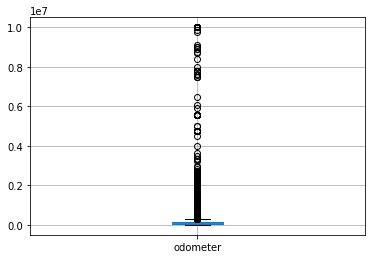

In [11]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df4.toPandas()

# Plot the boxplot using Pandas
pandas_df.boxplot(column='odometer')

# Show the plot
plt.show()


In [12]:
pandas_df.describe()

,odometer
count,3.916900e+05
mean,9.872930e+04
std,2.059169e+05
min,0.000000e+00
25%,3.800000e+04
50%,8.700000e+04
75%,1.353340e+05
max,1.000000e+07


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

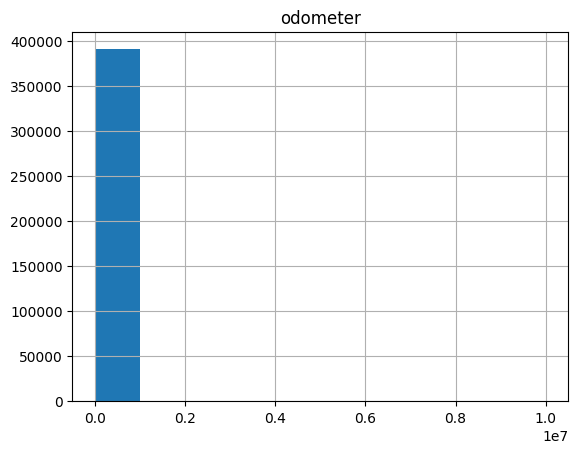

In [13]:
pandas_df.hist()

In [14]:
# Fill null values in specific columns with different values
df5 = df4.fillna({'odometer': 98729})

In [15]:
null_count = df5.filter(col("odometer").isNull()).count()
print("null records" ,null_count)

null_count = df5.filter(col("odometer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df5.select('odometer').count()

print("total count ",total_count)


null records 0
not null records 399808
total count  399808


# year

In [16]:
from pyspark.sql.functions import to_timestamp, year

# Assuming df is your Spark DataFrame with a column named 'timestamp_str' of string type
# Convert the string column to a timestamp column
df6 = df5.withColumn('year', to_timestamp(df['year'], 'yyyy-MM-dd HH:mm:ss'))

# Extract the year from the timestamp column
df6 = df5.withColumn('year', year(df['year']))


In [18]:
df6.printSchema()

root
 |-- price: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: integer (nullable = false)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)



In [19]:
null_count = df6.filter(col("year").isNull()).count()
print("null records" ,null_count)

null_count = df6.filter(col("year").isNotNull()).count()
print("not null records" ,null_count)

total_count = df6.select('year').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df6.groupBy('year').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df6.select("year").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 2045
not null records 397763
total count  399808
--------------------------------------
+----+-----+
|year|count|
+----+-----+
|1959|   89|
|1990|  592|
|1975|  193|
|1977|  261|
|1924|    9|
|2003| 6910|
|2007|14180|
|2018|32644|
|1974|  274|
|2015|27983|
|1927|   36|
|1955|  223|
|2006|12087|
|1978|  343|
|2022|  106|
|1961|   82|
|2013|28198|
|1942|   14|
|1939|   47|
|null| 2045|
+----+-----+
only showing top 20 rows

None
--------------------------------------
+----+
|year|
+----+
|1959|
|1990|
|1975|
|1977|
|1924|
|2003|
|2007|
|2018|
|1974|
|2015|
|1927|
|1955|
|2006|
|1978|
|2022|
|1961|
|2013|
|1942|
|1939|
|null|
+----+
only showing top 20 rows

114


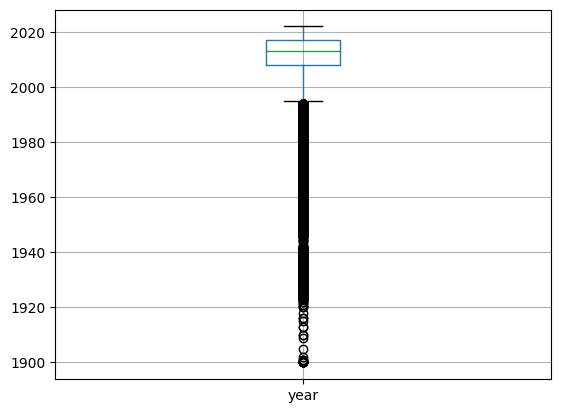

In [20]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df1 = df6.toPandas()

# Plot the boxplot using Pandas
pandas_df1.boxplot(column='year')

# Show the plot
plt.show()


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'odometer'}>]], dtype=object)

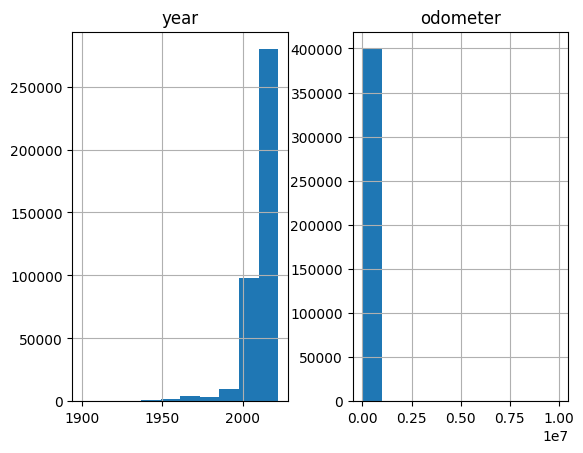

In [21]:
pandas_df1.hist()

In [22]:
pandas_df1.describe()

,year,odometer
count,397763.000000,3.998080e+05
mean,2011.127820,9.872929e+04
std,9.632793,2.038157e+05
min,1900.000000,0.000000e+00
25%,2008.000000,3.900000e+04
50%,2013.000000,8.900800e+04
75%,2017.000000,1.341660e+05
max,2022.000000,1.000000e+07


In [23]:
# Fill null values in specific columns with different values
df7 = df6.fillna({'year': 2011})

In [24]:
null_count = df7.filter(col("year").isNull()).count()
print("null records" ,null_count)

null records 0


# cylinder

In [25]:
null_count = df7.filter(col("cylinders").isNull()).count()
print("null records" ,null_count)

null_count = df7.filter(col("cylinders").isNotNull()).count()
print("not null records" ,null_count)

total_count = df7.select('cylinders').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df7.groupBy('cylinders').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df7.select("cylinders").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 166001
not null records 233807
total count  399808
--------------------------------------
+------------+------+
|   cylinders| count|
+------------+------+
|        null|166001|
| 3 cylinders|   613|
|       other|  1083|
|10 cylinders|  1389|
| 6 cylinders| 88846|
| 4 cylinders| 73005|
|12 cylinders|   204|
| 5 cylinders|  1670|
| 8 cylinders| 66762|
| f350 F-150 |    71|
|          LS|   164|
+------------+------+

None
--------------------------------------
+------------+
|   cylinders|
+------------+
|        null|
| 3 cylinders|
|       other|
|10 cylinders|
| 6 cylinders|
| 4 cylinders|
|12 cylinders|
| 5 cylinders|
| 8 cylinders|
| f350 F-150 |
|          LS|
+------------+

11


In [26]:
from pyspark.sql.functions import col

#Fill null values in the last_name column with the corresponding value from the first_name column
df8 = df7.withColumn("cylinders", col("cylinders").fillna(col("model")))

In [27]:
#Define a list of values to match
names_to_match = [' f350 F-150 ','other']

#Filter DataFrame to delete rows where name is in the list of values or is null
df8 = df7.filter((~col("cylinders").isin(names_to_match)) | (col("cylinders").isNull()))

In [29]:
null_count = df8.filter(col("cylinders").isNull()).count()
print("null records" ,null_count)

null_count = df8.filter(col("cylinders").isNotNull()).count()
print("not null records" ,null_count)

total_count = df8.select('cylinders').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df8.groupBy('cylinders').count()
print(value_counts.show())

print("--------------------------------------")
  
# Get unique records of a specific column
unique_records = df8.select("cylinders").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 166001
not null records 232653
total count  398654
--------------------------------------
+------------+------+
|   cylinders| count|
+------------+------+
|        null|166001|
| 3 cylinders|   613|
|10 cylinders|  1389|
| 6 cylinders| 88846|
| 4 cylinders| 73005|
|12 cylinders|   204|
| 5 cylinders|  1670|
| 8 cylinders| 66762|
|          LS|   164|
+------------+------+

None
--------------------------------------
+------------+
|   cylinders|
+------------+
|        null|
| 3 cylinders|
|10 cylinders|
| 6 cylinders|
| 4 cylinders|
|12 cylinders|
| 5 cylinders|
| 8 cylinders|
|          LS|
+------------+

9


In [30]:
# Assuming you have a DataFrame called df with a column 'column_name'
# Let's extract only the number from the 'column_name' column
df9 = df8.withColumn("cylinder_new", regexp_extract(df8["cylinders"], r'^(\d+)', 1))

In [31]:
df9.printSchema()

root
 |-- price: string (nullable = true)
 |-- year: integer (nullable = false)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: integer (nullable = false)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)
 |-- cylinder_new: string (nullable = true)



In [32]:
null_count = df9.filter(col("cylinder_new").isNull()).count()
print("null records" ,null_count)

null_count = df9.filter(col("cylinder_new").isNotNull()).count()
print("not null records" ,null_count)

total_count = df9.select('cylinder_new').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df9.groupBy('cylinder_new').count()
print(value_counts.show())

print("--------------------------------------")
  
# Get unique records of a specific column
unique_records = df9.select("cylinder_new").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 166001
not null records 232653
total count  398654
--------------------------------------
+------------+------+
|cylinder_new| count|
+------------+------+
|           3|   613|
|           8| 66762|
|        null|166001|
|           5|  1670|
|           6| 88846|
|          10|  1389|
|           4| 73005|
|          12|   204|
|            |   164|
+------------+------+

None
--------------------------------------
+------------+
|cylinder_new|
+------------+
|           3|
|           8|
|        null|
|           5|
|           6|
|          10|
|           4|
|          12|
|            |
+------------+

9


In [35]:
# converting odometer to integer type:

# Convert data type from string to integer
df10 = df9.withColumn("cylinder_new", col('cylinder_new').cast("int"))

# deleting column cylinders:
df11 = df10.drop('cylinders')

# Show the DataFrame schema to verify the changes
df11.printSchema()

root
 |-- price: string (nullable = true)
 |-- year: integer (nullable = false)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: integer (nullable = false)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)
 |-- cylinder_new: integer (nullable = true)



In [36]:
# paint_color

In [37]:
null_count = df11.filter(col("paint_color").isNull()).count()
print("null records" ,null_count)

null_count = df11.filter(col("paint_color").isNotNull()).count()
print("not null records" ,null_count)

total_count = df11.select('paint_color').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df11.groupBy('paint_color').count()
print(value_counts.show(15))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df11.select("paint_color").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 122544
not null records 276110
total count  398654
--------------------------------------
+-----------+------+
|paint_color| count|
+-----------+------+
|     orange|  1849|
|       grey| 22791|
|      green|  7036|
|     yellow|  2025|
|       null|122544|
|     silver| 39990|
|     purple|   671|
|      white| 72633|
|        red| 28764|
|     custom|  6285|
|      black| 58344|
|      brown|  6174|
|       blue| 29384|
|         RT|   164|
+-----------+------+

None
--------------------------------------
+-----------+
|paint_color|
+-----------+
|     orange|
|       grey|
|      green|
|     yellow|
|       null|
|     silver|
|     purple|
|      white|
|        red|
|     custom|
|      black|
|      brown|
|       blue|
|         RT|
+-----------+

14


In [38]:
df12 = df11.na.drop(subset=["paint_color"])

null_count = df12.filter(col("paint_color").isNull()).count()
print("null records" ,null_count)

null records 0


# drive

In [39]:
null_count = df12.filter(col("drive").isNull()).count()
print("null records" ,null_count)

null_count = df12.filter(col("drive").isNotNull()).count()
print("not null records" ,null_count)

total_count = df12.select('drive').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df12.groupBy('drive').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df12.select("drive").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 54814
not null records 221296
total count  276110
--------------------------------------
+-----+-----+
|drive|count|
+-----+-----+
| null|54814|
|  fwd|80538|
|  rwd|47481|
|  4wd|93113|
|   X3|  164|
+-----+-----+

None
--------------------------------------
+-----+
|drive|
+-----+
| null|
|  fwd|
|  rwd|
|  4wd|
|   X3|
+-----+

5


In [41]:
#Define a list of values to match
names_to_match = ['fwd','rwd','4wd']

#Filter DataFrame to select rows where name is in the list of values or is null
df13 = df12.filter((col("drive").isin(names_to_match)) | (col("drive").isNull()))

In [42]:
null_count = df13.filter(col("drive").isNull()).count()
print("null records" ,null_count)

null_count = df13.filter(col("drive").isNotNull()).count()
print("not null records" ,null_count)

total_count = df13.select('drive').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df13.groupBy('drive').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df13.select("drive").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 54814
not null records 221132
total count  275946
--------------------------------------
+-----+-----+
|drive|count|
+-----+-----+
| null|54814|
|  fwd|80538|
|  rwd|47481|
|  4wd|93113|
+-----+-----+

None
--------------------------------------
+-----+
|drive|
+-----+
| null|
|  fwd|
|  rwd|
|  4wd|
+-----+

4


In [43]:
df14 = df13.na.drop(subset=["drive"])

null_count = df14.filter(col("drive").isNull()).count()
print("null records" ,null_count)

null records 0


# manufacturer 

In [45]:
null_count = df14.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df14.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df14.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df14.groupBy('manufacturer').count()
print(value_counts.show(43))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df14.select("manufacturer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 8496
not null records 212636
total count  221132
--------------------------------------
+---------------+-----+
|   manufacturer|count|
+---------------+-----+
|         jaguar|  677|
|          buick| 2666|
|     mitsubishi| 1796|
|        pontiac| 1233|
|          lexus| 4280|
|           null| 8496|
|         toyota|18710|
|       chrysler| 3168|
|          tesla|  463|
|        lincoln| 2182|
|           audi| 2348|
|         datsun|   31|
|            bmw| 6761|
|           jeep|11218|
|          dodge| 7219|
|          rover| 1042|
|        hyundai| 5512|
|           ford|38825|
|     alfa-romeo|  253|
|       cadillac| 3153|
|            ram| 9154|
|          mazda| 2937|
|        ferrari|   33|
|            kia| 4370|
|  mercedes-benz| 5159|
|        porsche|  592|
|         saturn|  571|
|      chevrolet|29569|
|          honda|11507|
|           mini| 1368|
|           fiat|  411|
|     volkswagen| 5337|
|        mercury|  625|
|harley-davidson|   46|
|          

In [46]:
df15 = df14.na.drop(subset=["manufacturer"])

null_count = df15.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null records 0


# model

In [47]:
null_count = df15.filter(col("model").isNull()).count()
print("null records" ,null_count)

null_count = df15.filter(col("model").isNotNull()).count()
print("not null records" ,null_count)

total_count = df15.select('model').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df15.groupBy('model').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df15.select("model").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 1800
not null records 210836
total count  212636
--------------------------------------
+--------------------+-----+
|               model|count|
+--------------------+-----+
|            lacrosse|  200|
|             4runner|  638|
|                 dts|  142|
|                 hse|   29|
|super duty f-350 ...|    2|
|                hr-v|   75|
|          charger se|   38|
|      avalon limited|   43|
|       sonata hybrid|   56|
|         2500 diesel|   21|
|                 xk8|   20|
|               azera|   18|
|transit connect c...|   25|
|  cherokee trailhawk|   16|
|   eclipse cross sel|   17|
|          crv lx awd|   13|
|                m 37|    1|
|  silverado 3500 ltz|    7|
|journey se sport ...|   32|
|           sentra sv|   88|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|               model|
+--------------------+
|            lacrosse|
|             4runner|
|                 

In [48]:
df16 = df15.na.drop(subset=["model"])

null_count = df16.filter(col("model").isNull()).count()
print("null records" ,null_count)

null records 0


In [49]:
null_count = df16.filter(col("fuel").isNull()).count()
print("null records" ,null_count)

null_count = df16.filter(col("fuel").isNotNull()).count()
print("not null records" ,null_count)

total_count = df16.select('fuel').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df16.groupBy('fuel').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df16.select("fuel").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 1118
not null records 209718
total count  210836
--------------------------------------
+--------+------+
|    fuel| count|
+--------+------+
|     gas|181360|
|    null|  1118|
|   other| 11478|
|  diesel| 13058|
|  hybrid|  2981|
|electric|   841|
+--------+------+

None
--------------------------------------
+--------+
|    fuel|
+--------+
|     gas|
|    null|
|   other|
|  diesel|
|  hybrid|
|electric|
+--------+

6


In [50]:
df17 = df16.na.drop(subset=["model"])

null_count = df17.filter(col("model").isNull()).count()
print("null records" ,null_count)

null records 0


# transmission

In [51]:
null_count = df17.filter(col("transmission").isNull()).count()
print("null records" ,null_count)

null_count = df17.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df17.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df17.groupBy('transmission').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df17.select("transmission").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 551
not null records 210285
total count  210836
--------------------------------------
+------------+------+
|transmission| count|
+------------+------+
|        null|   551|
|   automatic|170171|
|       other| 27984|
|      manual| 12130|
+------------+------+

None
--------------------------------------
+------------+
|transmission|
+------------+
|        null|
|   automatic|
|       other|
|      manual|
+------------+

4


In [52]:
# fill null values with model:
df18 = df17.fillna('automatic',subset=['transmission'])

In [53]:
null_count = df18.filter(col("transmission").isNull()).count()
print("null records" ,null_count)

null_count = df18.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df18.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df18.groupBy('transmission').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df18.select("transmission").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 210836
total count  210836
--------------------------------------
+------------+------+
|transmission| count|
+------------+------+
|   automatic|170722|
|       other| 27984|
|      manual| 12130|
+------------+------+

None
--------------------------------------
+------------+
|transmission|
+------------+
|   automatic|
|       other|
|      manual|
+------------+

3


In [54]:
null_count = df18.filter(col("title_status").isNull()).count()
print("null records" ,null_count)

null_count = df18.filter(col("title_status").isNotNull()).count()
print("not null records" ,null_count)

total_count = df18.select('title_status').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df18.groupBy('title_status').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df18.select("title_status").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 785
not null records 210051
total count  210836
--------------------------------------
+------------+------+
|title_status| count|
+------------+------+
|        null|   785|
|        lien|  1033|
|     missing|   234|
|       clean|202134|
|     salvage|  2123|
|     rebuilt|  4464|
|  parts only|    63|
+------------+------+

None
--------------------------------------
+------------+
|title_status|
+------------+
|        null|
|        lien|
|     missing|
|       clean|
|     salvage|
|     rebuilt|
|  parts only|
+------------+

7


In [ ]:
# fill null values with clean:
df19 = df8.fillna('clean',subset=['transmission'])

In [133]:
df18.write.csv("output_middle.csv", header=True, mode="overwrite")

In [135]:
# Save DataFrame to CSV format
df18.write.csv("file:///D:/DBDA/project1.csv")

In [137]:
# Save DataFrame to a single CSV file
df18.coalesce(1).write.csv("file:///D:/DBDA/project2.csv", header=True)


In [ ]:
null_count = df17.filter(col("").isNull()).count()
print("null records" ,null_count)

null_count = df17.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df17.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df17.groupBy('transmission').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df17.select("transmission").distinct()

# Show the unique records
unique_records.show()
   
# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

# state

In [103]:
null_count = df11.filter(col("state").isNull()).count()
print("null records" ,null_count)

null_count = df11.filter(col("state").isNotNull()).count()
print("not null records" ,null_count)

total_count = df11.select('state').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df11.groupBy('state').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df11.select("state").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 12863
not null records 385791
total count  398654
--------------------------------------
+--------------------+-----+
|               state|count|
+--------------------+-----+
| TIMING BELT AND ...|   31|
| FRESHLY SERVICED...|   17|
| do not contact m...|    1|
|          bad credit|   31|
|     finance charges|  137|
|           Ford Axle|    1|
| Absolutely Stunn...|    3|
| finished in MAGN...|    2|
| Full dash instru...|    1|
| tailgate step w/...|    2|
|                 LR4|    2|
| Active Parking A...|    2|
| the 2007 models ...|    1|
| 4-Way Manual Fro...|    2|
| Leather Trimmed ...|    1|
|                 A/C|    2|
| Mopar Trailer To...|    1|
|1Sd Preferred Equ...|    1|
| low-pressure gas...|    1|
| HondaLink Next G...|    1|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|               state|
+--------------------+
| TIMING BELT AND ...|
| FRESHLY SERVICED...|
| do not contact 

In [107]:
df11.select('state').collect()[5][0]

'ny'

# condition

In [101]:
null_count = df11.filter(col("condition").isNull()).count()
print("null records" ,null_count)

null_count = df11.filter(col("condition").isNotNull()).count()
print("not null records" ,null_count)

total_count = df11.select('condition').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df11.groupBy('condition').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df11.select("condition").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 156584
not null records 242070
total count  398654
--------------------------------------
+-------------+------+
|    condition| count|
+-------------+------+
|          new|  1118|
|         null|156584|
|    excellent| 94658|
|      salvage|   578|
|     like new| 19955|
|         good|118936|
|         fair|  6661|
| 2017** ** GS|   164|
+-------------+------+

None
--------------------------------------
+-------------+
|    condition|
+-------------+
|          new|
|         null|
|    excellent|
|      salvage|
|     like new|
|         good|
|         fair|
| 2017** ** GS|
+-------------+

8


# model

In [27]:
null_count = df3.filter(col("model").isNull()).count()
print("null records" ,null_count)

null_count = df3.filter(col("model").isNotNull()).count()
print("not null records" ,null_count)

total_count = df3.select('model').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df3.groupBy('model').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df3.select("model").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 9492
not null records 389515
total count  399007
--------------------------------------
+--------------------+-----+
|               model|count|
+--------------------+-----+
|            lacrosse|  396|
|             4runner|  986|
|                 dts|  243|
|           cts sedan|   46|
|           1969 nova|    1|
|                 hse|   66|
|super duty f-350 ...|    2|
|                 xk8|   28|
|                hr-v|  153|
|       sonata hybrid|   87|
|          charger se|   59|
|      avalon limited|   67|
|         2500 diesel|   33|
|               gem 2|    1|
|               azera|   39|
|transit connect c...|   29|
|  cherokee trailhawk|   24|
|   eclipse cross sel|   30|
|           sentra sv|  175|
|          crv lx awd|   24|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|               model|
+--------------------+
|            lacrosse|
|             4runner|
|                 

# manufacturer

In [26]:
null_count = df3.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df3.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df3.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df3.groupBy('manufacturer').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df3.select("year").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 20977
not null records 378030
total count  399007
--------------------------------------
+------------+-----+
|manufacturer|count|
+------------+-----+
|      jaguar| 1902|
|       buick| 5184|
|  mitsubishi| 3109|
|     pontiac| 2230|
|       lexus| 7741|
|        null|20977|
|      toyota|31598|
|    chrysler| 5656|
|       tesla|  847|
|     lincoln| 4035|
|        audi| 7180|
|      datsun|   63|
|         bmw|13745|
|        jeep|17461|
|       dodge|12369|
|       rover| 1992|
|     hyundai| 9374|
|        ford|64855|
|  alfa-romeo|  870|
|    cadillac| 6591|
+------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|                year|
+--------------------+
|2021-04-30T19:31:...|
|                1953|
|2021-04-30T19:11:...|
|2021-04-23T20:48:...|
|2021-05-03T14:10:...|
|                1957|
|2021-04-23T20:44:...|
|                1987|
|2021-05-04T10:41:...|
|                1956|
|2021-05-03T16:59:...|
|2

# year

In [13]:
null_count = df3.filter(col("year").isNull()).count()
print("null records" ,null_count)

null_count = df3.filter(col("year").isNotNull()).count()
print("not null records" ,null_count)

total_count = df3.select('year').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df3.groupBy('year').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df3.select("year").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 1173
not null records 397834
total count  399007
--------------------------------------
+--------------------+-----+
|                year|count|
+--------------------+-----+
|2021-04-30T19:31:...|    1|
|                1953|  104|
|2021-04-30T19:11:...|    1|
|2021-04-23T20:48:...|    1|
|2021-05-03T14:10:...|    1|
|                1957|  164|
|2021-04-23T20:44:...|    1|
|                1987|  523|
|2021-05-04T10:41:...|    1|
|                1956|  159|
|2021-05-03T16:59:...|    1|
|2021-04-23T20:44:...|    1|
|2021-04-16T20:38:...|    1|
|2021-04-23T14:03:...|    1|
|2021-04-30T19:05:...|    1|
|                2016|27401|
|                1936|   43|
|2021-04-29T14:00:...|    1|
|2021-05-01T17:35:...|    1|
|                2020|17807|
+--------------------+-----+
only showing top 20 rows

None
--------------------------------------
+--------------------+
|                year|
+--------------------+
|2021-04-30T19:31:...|
|                1953|
|2021-04-30T19:11:

In [22]:
# Convert year string column to integer

df4 = df3.withColumn('year',to_date(df['year'],'yyyy-MM-dd'))

In [24]:
df4.printSchema()

root
 |-- region: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: date (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- size: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- state: string (nullable = true)

